##Regresión Logística
Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de regresión logística para aplicarla a los modelos de clasificación.

Supongamos que queremos clasificar dos tipos, basado en dos características:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

Text(0, 0.5, 'X_2')

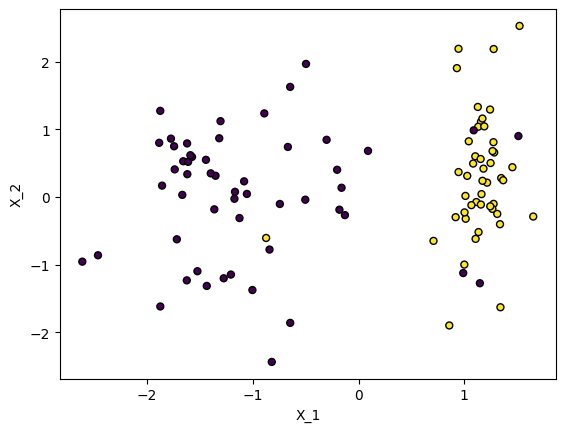

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

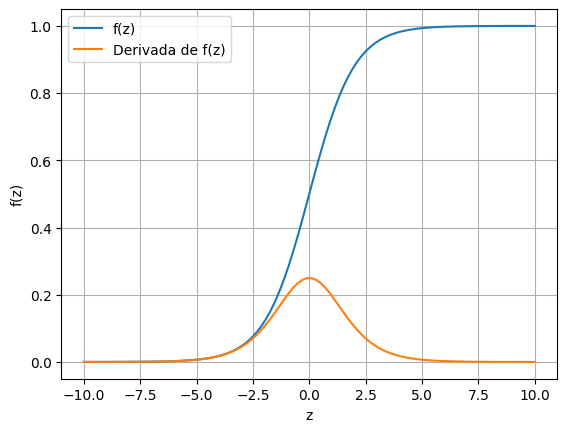

In [ ]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()
plt.show()

In [ ]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

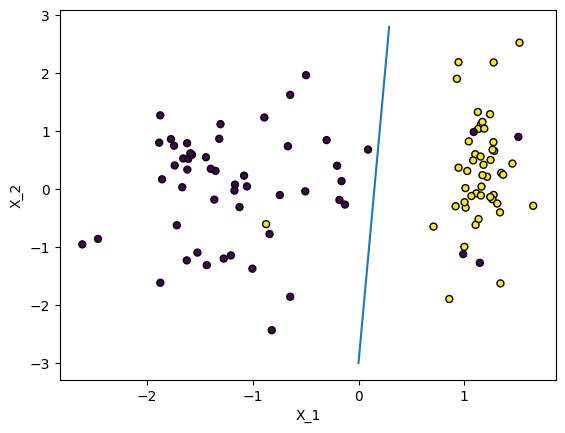

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

(-1.12244940477901, 1.1839643638442499, -1.2696420440360447, 1.185918477713659)

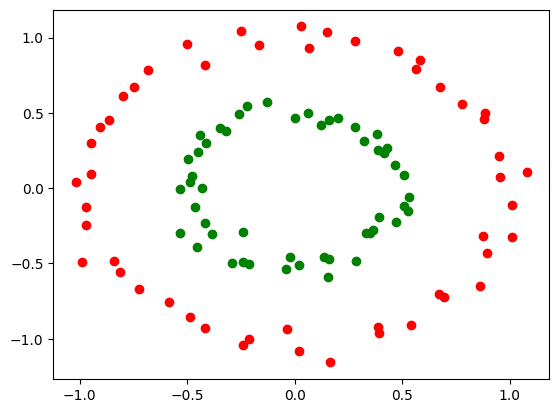

In [ ]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Text(0, 0.5, 'X_2')

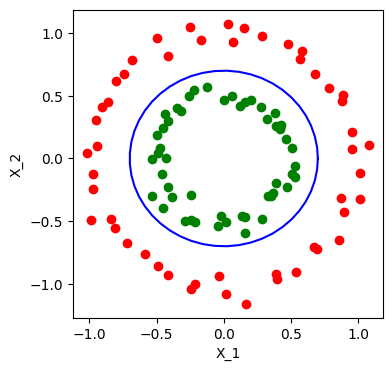

In [ ]:
#Por motivos graficos convirtamos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

In [ ]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt

In [ ]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris["data"]
Y = iris["target"]

In [ ]:
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [ ]:
df.columns=cols
df["Target"]=Y

In [ ]:
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
df_train = strat_train_set
df_test = strat_test_set

In [ ]:
df_test.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
38,4.4,3.0,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
57,4.9,2.4,3.3,1.0,1
93,5.0,2.3,3.3,1.0,1
42,4.4,3.2,1.3,0.2,0


In [ ]:
df_train.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1


In [ ]:
#Seleccion de valores de y
# Tomemos solo una caractgeristicas por motivos didacticos
y_train = (df_train['Target'] == 0).astype(float) # forma rapida, se puede one hot enconder
X_train = df_train.iloc[:,0:1].values

y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train

,Target
8,1.0
106,0.0
76,0.0
9,1.0
89,0.0
...,...
37,1.0
2,1.0
33,1.0
52,0.0


In [ ]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.9166666666666666
0.8


In [ ]:
# Determinacion de la frontera
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

In [ ]:
prob

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99999932e-01, 6.78835346e-08],
       [9.99999937e-01, 6.31876491e-08],
       [9.99999941e-01, 5.88166044e-08]])

In [ ]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([5.35535536])

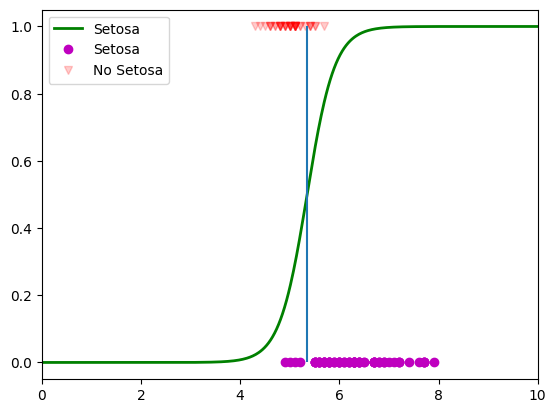

In [ ]:
plt.figure()
#Regresion Logistica
plt.plot(X_new, prob[:, 0], "g-", linewidth=2, label="Setosa")
# Forntera de desicion
plt.plot(X_train[y_train==0], y_train[y_train==0],"mo",label = "Setosa")
plt.plot(X_train[y_train==1], y_train[y_train==1],"rv",alpha=0.2,label="No Setosa")
plt.xlim(0.0,10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

## Tarea 8.1
¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input definir a que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

In [ ]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']#Para entrenar con mas carateristicas el modelo
model = LogisticRegression(max_iter=300)
model.fit(X, y)

LogisticRegression(max_iter=300)

In [ ]:
def predictor_clase(input): #Función para predeciar a que clase pertenece
    probabilidades = model.predict_proba([input])

    prob_versicolor = probabilidades[0][1]  #Clase versicolor la definimos con la etiqueta 1
    prob_virginica = probabilidades[0][2]   #Clase virginica la definimos con etiqueta 2

    if prob_versicolor > prob_virginica:
        return "versicolor", prob_versicolor
    else:
        return "virginica", prob_virginica


In [ ]:
input = [4.9, 5.0, 1.8, 0.3]
predicted_class, probabilidad = predictor_clase(input)
print(f"El modelo predice que dadas las carateristicas la flor pertenece a la clase: {predicted_class}, con una probablidad de: {round(probabilidad,2)}")

El modelo predice que dadas las carateristicas la flor pertenece a la clase: versicolor, con una probablidad de: 0.01


In [ ]:
#Para graficar vamos a filtrar solo las clases versicolor con la etiqueta 1 y virginica con la etiqueta 2
X_filtered = X[(y == 1) | (y == 2)]
y_filtered = y[(y == 1) | (y == 2)]

In [ ]:
X_filtered = X_filtered[:, :2] #Vamos a seleccionar solo las dos primeras características (longitud y ancho del sépalo) para poder hacer la grafica
model = LogisticRegression(max_iter=200)
model.fit(X_filtered, y_filtered)

LogisticRegression(max_iter=200)

In [ ]:
# Crear un grid de puntos para graficar la frontera de decisión
x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #Predecir las clases para cada punto
Z = Z.reshape(xx.shape)

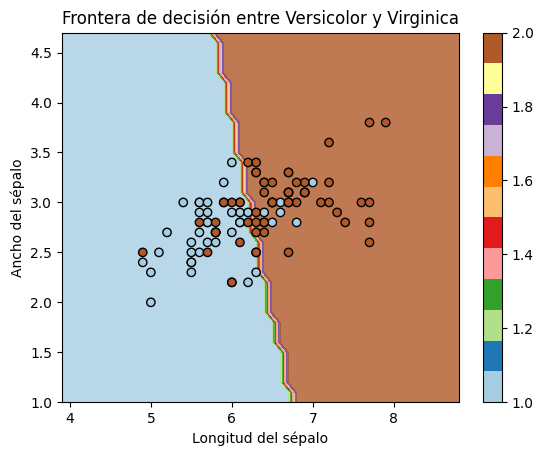

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired) #Para graficar la frontera de decisión
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title("Frontera de decisión entre Versicolor y Virginica")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.colorbar()
plt.show()
